In [1]:
import pandas as pd
import numpy as np

In [5]:
#reading the csv file

df=pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [7]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [9]:
#we can see date is comming as object 

df.date.value_counts()

date
01-01-1990 00:00    1
03-11-2003 00:00    1
15-11-2003 00:00    1
14-11-2003 00:00    1
13-11-2003 00:00    1
                   ..
30-11-1996 00:00    1
29-11-1996 00:00    1
28-11-1996 00:00    1
27-11-1996 00:00    1
10-10-2010 00:00    1
Name: count, Length: 7588, dtype: int64

In [11]:
#we can see the time is 00 always

df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')

#removing the time and extract the date

df['date']=df['date'].dt.date

df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [13]:
#conveting to datetime

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

#unique years

unique_years=df['date'].dt.year.unique()

unique_years

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [15]:
#checking for the null values

df.isnull().sum()
                         #there are no null values present in the columns

date       0
Ex_rate    0
dtype: int64

Text(0, 0.5, 'Exchange Rate')

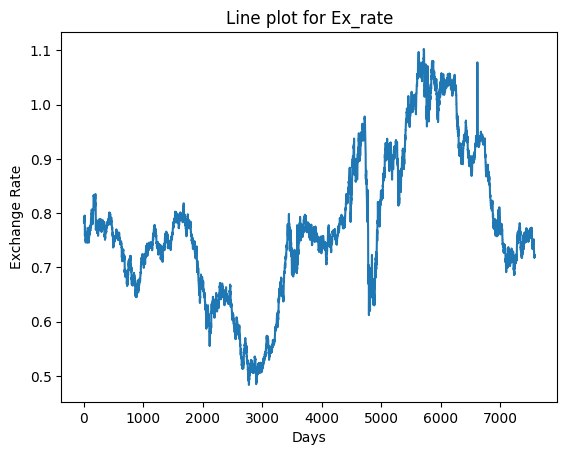

In [17]:
#line plot

ax=df['Ex_rate'].plot(title="Line plot for Ex_rate")
ax.set_xlabel("Days")
ax.set_ylabel("Exchange Rate")

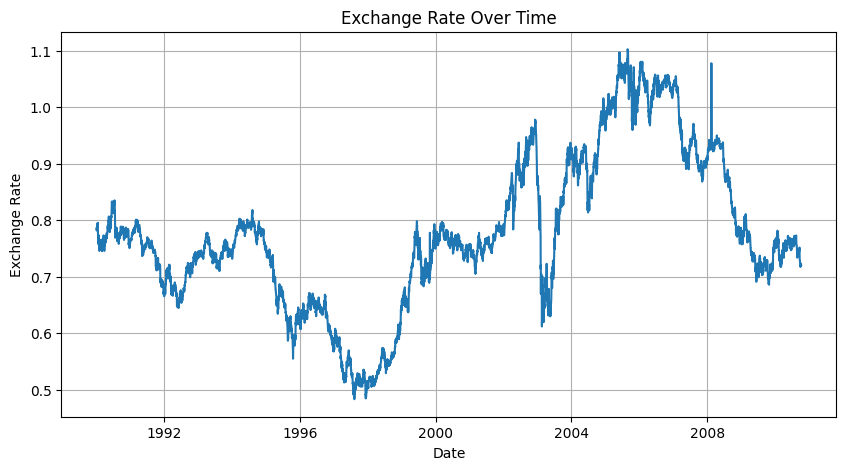

In [19]:
#using matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['date'],df['Ex_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.grid(True)
plt.show()

In [21]:
print("From the above plot we cannot find any seasonility ")

From the above plot we cannot find any seasonility 


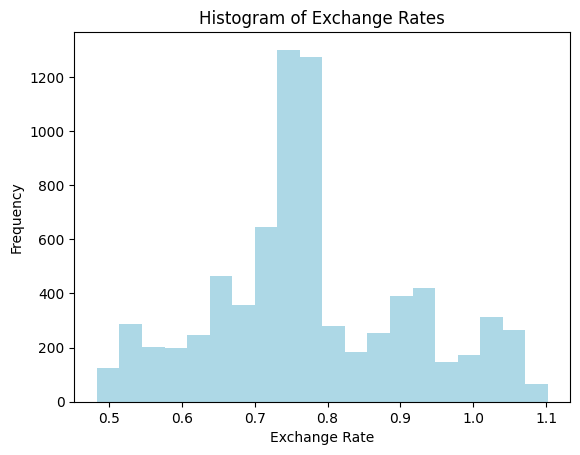

In [23]:
#creating a histogram to check the distribution of data

plt.hist(df['Ex_rate'],bins=20,color='lightblue')

plt.xlabel("Exchange Rate")
plt.ylabel("Frequency")
plt.title("Histogram of Exchange Rates")
plt.show()

In [25]:
print("skewness of exchange rate",df['Ex_rate'].skew())

print("So by observing the skewness we can say that the data is 'Slightly positively Skewed'\n")
print("So we can conclude that the exchange rate is mostly below 0.8")

skewness of exchange rate 0.2611267376737365
So by observing the skewness we can say that the data is 'Slightly positively Skewed'

So we can conclude that the exchange rate is mostly below 0.8


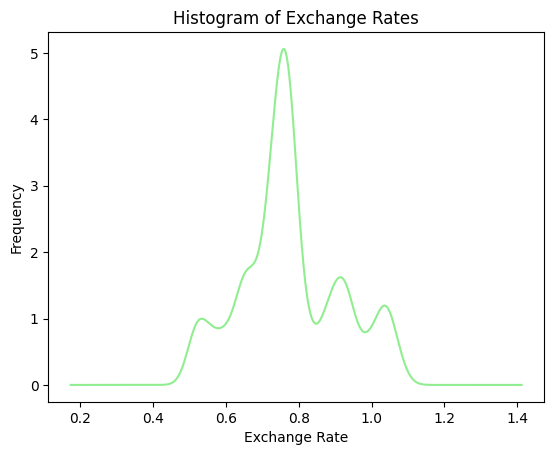

In [27]:
#creating a density  plot(Kernel Density Estimation(kde))


df['Ex_rate'].plot(kind='kde',color='lightgreen')

plt.xlabel("Exchange Rate")
plt.ylabel("Frequency")
plt.title("Histogram of Exchange Rates")
plt.show()

<Axes: xlabel='unique_years', ylabel='Ex_rate'>

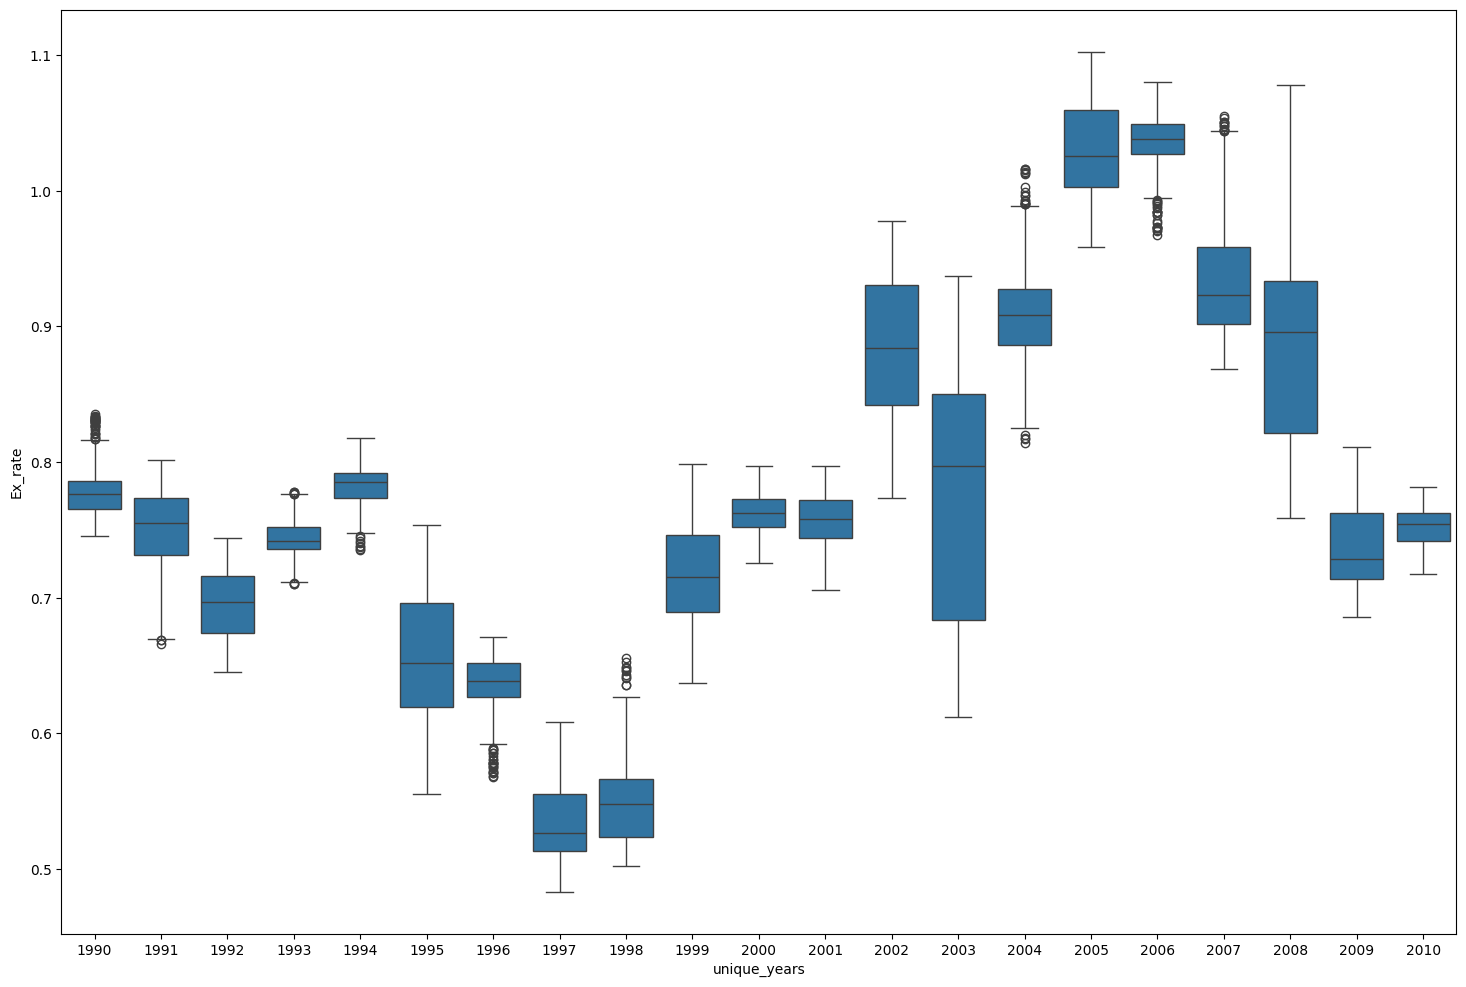

In [29]:
            #creating a box plot

import seaborn as sns

df_new=df

df_new['date']=pd.to_datetime(df_new.date,format='%d-%m-%Y')
df_new['unique_years']=df_new['date'].dt.year


plt.figure(figsize=(18,12))
sns.boxplot(x='unique_years',y='Ex_rate',data=df_new)                                                                                     

In [31]:
print("From the above box plots we can conclude that the year 2003 the Exchange rate has changed in a large interval when compared to other years and for the year 2005 and 2006 the 'Exchange rate' was on the peak .We can for most of the years the exchange rate was at 0.7 to 0.8")

From the above box plots we can conclude that the year 2003 the Exchange rate has changed in a large interval when compared to other years and for the year 2005 and 2006 the 'Exchange rate' was on the peak .We can for most of the years the exchange rate was at 0.7 to 0.8


In [33]:
df_new

,date,Ex_rate,unique_years
0,1990-01-01,0.785500,1990
1,1990-01-02,0.781800,1990
2,1990-01-03,0.786700,1990
3,1990-01-04,0.786000,1990
4,1990-01-05,0.784900,1990
...,...,...,...
7583,2010-10-06,0.718494,2010
7584,2010-10-07,0.721839,2010
7585,2010-10-08,0.723197,2010
7586,2010-10-09,0.720825,2010


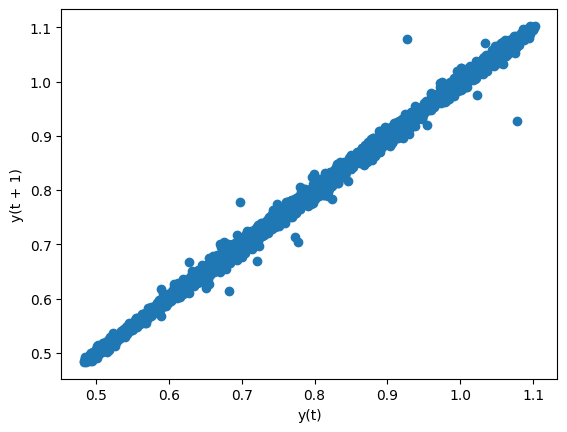

In [35]:
#### Lag plot
# create a scatter plot

from pandas.plotting import lag_plot
lag_plot(df["Ex_rate"])
plt.show()

In [37]:
print("LAG-PLOT  is useful for analyzing autocolleration-whether the current values in a dataset depends on previous values.\n")
print("1.Strong Diagnol(linear relationship) If the points form a clear diagonal line, it suggests strong autocorrelation (past values influence future ones)\n. Example: Stock prices or weather data often show this trend.\n")
print("2.Random Scattering(No pattern) - If the points are randomly spread, there is little to no correlation between past and future values.\n- Example: White noise or purely random data.\n")
print("3.Curved/Non linear pattern:- A curved shape might indicate a nonlinear relationship\n- Example: Some economic trends or cyclical behaviors.\n")
print("4.Clustered Points:- If values form distinct clusters, it may suggest periodic trends.\n- Example: Seasonal or categorical data.")

LAG-PLOT  is useful for analyzing autocolleration-whether the current values in a dataset depends on previous values.

1.Strong Diagnol(linear relationship) If the points form a clear diagonal line, it suggests strong autocorrelation (past values influence future ones)
. Example: Stock prices or weather data often show this trend.

2.Random Scattering(No pattern) - If the points are randomly spread, there is little to no correlation between past and future values.
- Example: White noise or purely random data.

3.Curved/Non linear pattern:- A curved shape might indicate a nonlinear relationship
- Example: Some economic trends or cyclical behaviors.

4.Clustered Points:- If values form distinct clusters, it may suggest periodic trends.
- Example: Seasonal or categorical data.


## part 2: Model Building - ARIMA
1.parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

P=order of AR-Autoregression using PACF plot
d=Order of Difference check for the stationary {if it is not stationary at each differencing step increase "d" by 1}
q=Order of Moving Average using ACF plot
ACF(auto colleralation ):- ACF helps in identifying how past values correlate with the current value.

<Figure size 8000x6000 with 0 Axes>

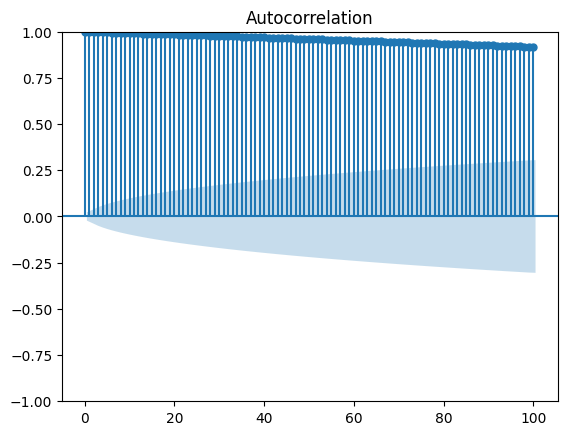

In [41]:
# auto correlation 

from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (80,60))

plot_acf(df["Ex_rate"],lags=100)
plt.show()

## PACF(partial auto collerartion):- PACF is useful for selecting ARIMA model parameters (p and q).

<Figure size 4000x1000 with 0 Axes>

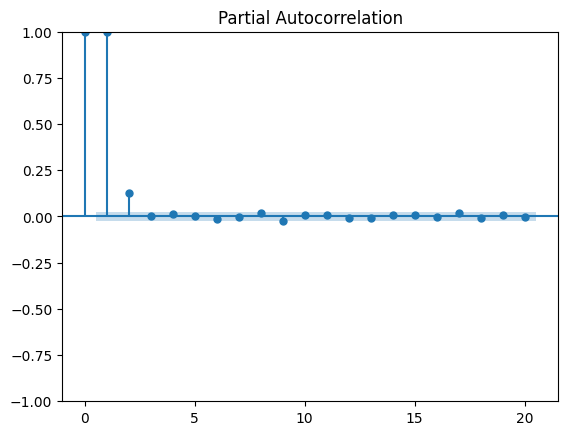

In [44]:
#creating a partial auto colleration plot

from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (40,10))

plot_pacf(df["Ex_rate"],lags=20)
plt.show()

In [46]:
#determining the AR model{P}

print("from the above graph we can conclude that there is a significant spike at lag 1 and lag 2 although it is closer to the significant threshold.After the lag 2 the correlation fall within the insignificant range.\nTherefore the order of AR(Auto Colerration) P=1 or 2")

from the above graph we can conclude that there is a significant spike at lag 1 and lag 2 although it is closer to the significant threshold.After the lag 2 the correlation fall within the insignificant range.
Therefore the order of AR(Auto Colerration) P=1 or 2


In [48]:
#Augmented dickey fuller test to find best p d q values

In [50]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 


# Selecting the currency exchange rate column
series = df_new['Ex_rate']  

# Check for Stationarity using Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = adfuller(series)
    print(result)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Series is stationary.")
    else:
        print("Series is non-stationary, differencing needed.")
        print()

adf_test(series)

# Perform Differencing if Needed (Finding d)

diff_series = series.diff().dropna()
adf_test(diff_series)  # Check stationarity after differencing

(-1.6649941807381528, 0.4492327353597901, 1, 7586, {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}, -55835.06254628545)
ADF Statistic: -1.6649941807381528
p-value: 0.4492327353597901
Series is non-stationary, differencing needed.

(-99.39343120118629, 0.0, 0, 7586, {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}, -55825.924350489135)
ADF Statistic: -99.39343120118629
p-value: 0.0
Series is stationary.


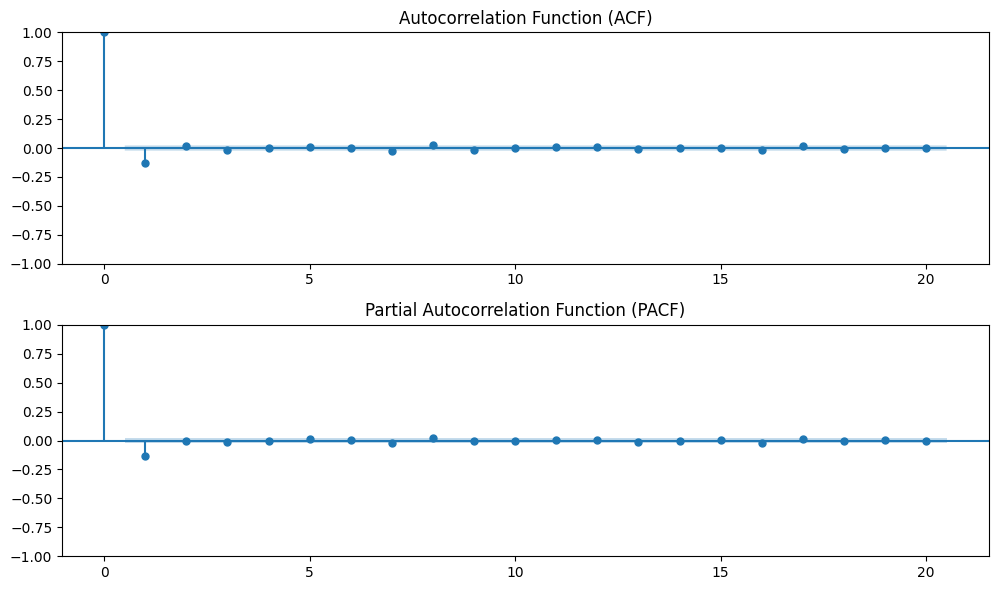

In [52]:
# Plot ACF and PACF to determine p and q values after d value reducing
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(diff_series, ax=ax[0], lags=20)
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(diff_series,  ax=ax[1], lags=20)
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [54]:
print("From the acf and pacf plots,and augumented deckey fuller(adf) test we can conclude that:\n\n p=1(from ACF plot a sharp cutoff after lag1)\n d=1 (from augumented deckey fuller-adf the p value is <0.05 the series is stationary at d=1)\n q=1 (from acf plot shows a sharp cutoff after lag 1)")

From the acf and pacf plots,and augumented deckey fuller(adf) test we can conclude that:

 p=1(from ACF plot a sharp cutoff after lag1)
 d=1 (from augumented deckey fuller-adf the p value is <0.05 the series is stationary at d=1)
 q=1 (from acf plot shows a sharp cutoff after lag 1)


## Fitting the ARIMA model

In [57]:
from statsmodels.tsa.arima.model import ARIMA

p,q,d=1,1,1

model=ARIMA(df_new['Ex_rate'],order=(p,q,d))
model_fit=model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 10 Jun 2025   AIC                         -56102.322
Time:                        13:58:21   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [59]:
# calculating the metrics

model_fit.resid
mse=np.mean(model_fit.resid**2)
print("Mean square Error",mse)
print()
rmse=np.sqrt(mse)
print("Root Mean Squared Error",rmse)

Mean square Error 0.00011726565314349985

Root Mean Squared Error 0.010828926684741192


In [61]:
print("******************** Interpreting the results *************************\n\n")

print("From the classification report the \n1 Log Likelihood=28054 indicates how well the model fits the data.Higher values suggest a better fit \n")
print("2 AIC(Akaike Information Criterion)lower value indcates a better fitting model with fewer parameters\n")
print("3 BIC(Bayesian Information Criterion)Also used for model selection lowe is better")

******************** Interpreting the results *************************


From the classification report the 
1 Log Likelihood=28054 indicates how well the model fits the data.Higher values suggest a better fit 

2 AIC(Akaike Information Criterion)lower value indcates a better fitting model with fewer parameters

3 BIC(Bayesian Information Criterion)Also used for model selection lowe is better


In [63]:
#Model Diagonisis

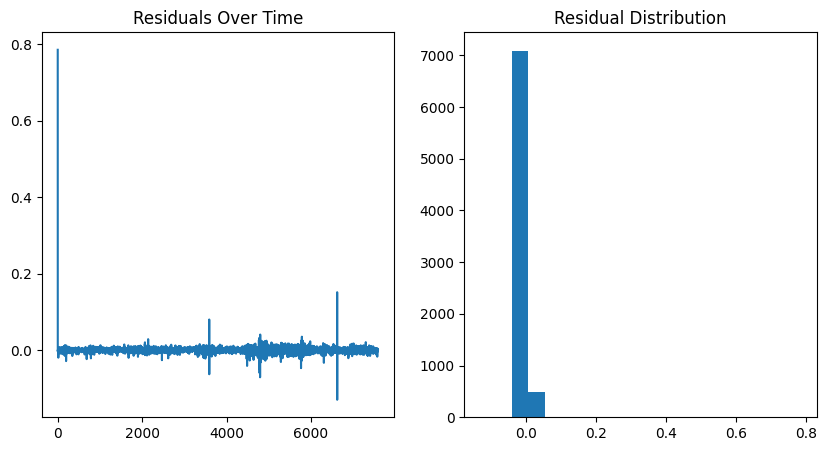

In [65]:
# Check Residuals
residuals = model_fit.resid

# Plot Residuals
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(residuals)
plt.title("Residuals Over Time")

plt.subplot(1,2,2)
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")

plt.show()

In [67]:
print("From the above plots we can conclude that for most of the time the error was contant other than 3 points where the redisuals are maximum\n.From the histogram we can conclude that the resuiduals was not tan 0.1 so we can say the model is perfect")

From the above plots we can conclude that for most of the time the error was contant other than 3 points where the redisuals are maximum
.From the histogram we can conclude that the resuiduals was not tan 0.1 so we can say the model is perfect


In [69]:
# Perform Ljung-Box Test (Check if residuals are random)
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

    lb_stat  lb_pvalue
10  1.81673   0.997562


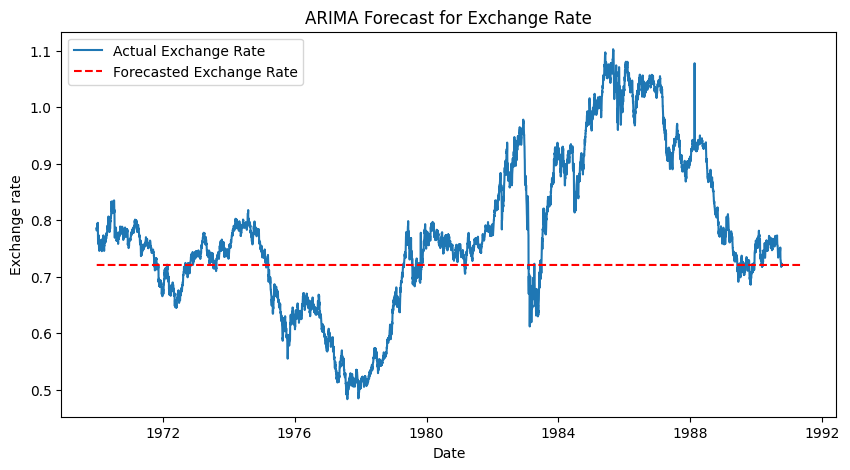

In [71]:
# Forecast Next 20 years
forecast_steps = 7800
forecast = model_fit.forecast(steps=forecast_steps)

# Create Date Index for Forecasted Values
future_dates = pd.date_range(start=series.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Plot Forecasted vs Actual Values
plt.figure(figsize=(10,5))
plt.plot(series, label="Actual Exchange Rate")
plt.plot(future_dates, forecast, label="Forecasted Exchange Rate", linestyle="dashed", color="red")
plt.title("ARIMA Forecast for Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange rate")
plt.legend()
plt.show()

In [73]:
print("************************ interpreting the plot ****************************\n\n")

print("from the above plot we can see the red dash line(forecast rate)appers to significantly lag behind the blue line(actual rate).")

print("This means the ARIMA model is generally slow to react to changes and trends in the actual exchange rate.When the actual rate goes up or down the forecast rate tends to follow with a delay")

************************ interpreting the plot ****************************


from the above plot we can see the red dash line(forecast rate)appers to significantly lag behind the blue line(actual rate).
This means the ARIMA model is generally slow to react to changes and trends in the actual exchange rate.When the actual rate goes up or down the forecast rate tends to follow with a delay


## Part 3: Model Building - Exponential Smoothing
Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

In [76]:
print('Exponential smoothing is a popular time series forecasting method that assigns exponentially {"decreasing weights to past observations"}. It helps predict future trends based on historical data\n')
print()
print("1- Simple Exponential Smoothing – Used when data has no trend or seasonality.\n2- Double\Holt's linear Exponential Smoothing – Accounts for trends in the data.\n3- Holt-Winters Exponential Smoothing – Handles both trend and seasonality.")

Exponential smoothing is a popular time series forecasting method that assigns exponentially {"decreasing weights to past observations"}. It helps predict future trends based on historical data


1- Simple Exponential Smoothing – Used when data has no trend or seasonality.
2- Double\Holt's linear Exponential Smoothing – Accounts for trends in the data.
3- Holt-Winters Exponential Smoothing – Handles both trend and seasonality.


<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
C:\Users\moham\AppData\Local\Temp\ipykernel_3180\2040141066.py:3: SyntaxWarning: invalid escape sequence '\H'
  print("1- Simple Exponential Smoothing – Used when data has no trend or seasonality.\n2- Double\Holt's linear Exponential Smoothing – Accounts for trends in the data.\n3- Holt-Winters Exponential Smoothing – Handles both trend and seasonality.")


In [78]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


model=SimpleExpSmoothing(df_new['Ex_rate'])

model_fitt=model.fit(optimized=True)    #optimized=True-->auto choose the smoothvalue to minimize the mse

print("The smoothing level taken by model=",model_fit.params)
print()
#forecast for the next stpes(eg. next 5 years)

forecast=model_fitt.forecast(steps=1825)

rmse=np.sqrt(np.mean(model_fitt.resid**2))
print("Root mean square error",np.round(rmse,2))

The smoothing level taken by model= ar.L1    -0.126843
ma.L1    -0.004573
sigma2    0.000036
dtype: float64

Root mean square error 0.01


In [80]:
#printing the forecasting values and fitted values

print("fitted values:",model_fitt.fittedvalues)
print("forecasted values :",forecast)

fitted values: 0       0.785500
1       0.785500
2       0.782287
3       0.786119
4       0.786016
          ...   
7583    0.718826
7584    0.718538
7585    0.721404
7586    0.722961
7587    0.721106
Length: 7588, dtype: float64
forecasted values : 7588    0.720862
7589    0.720862
7590    0.720862
7591    0.720862
7592    0.720862
          ...   
9408    0.720862
9409    0.720862
9410    0.720862
9411    0.720862
9412    0.720862
Length: 1825, dtype: float64


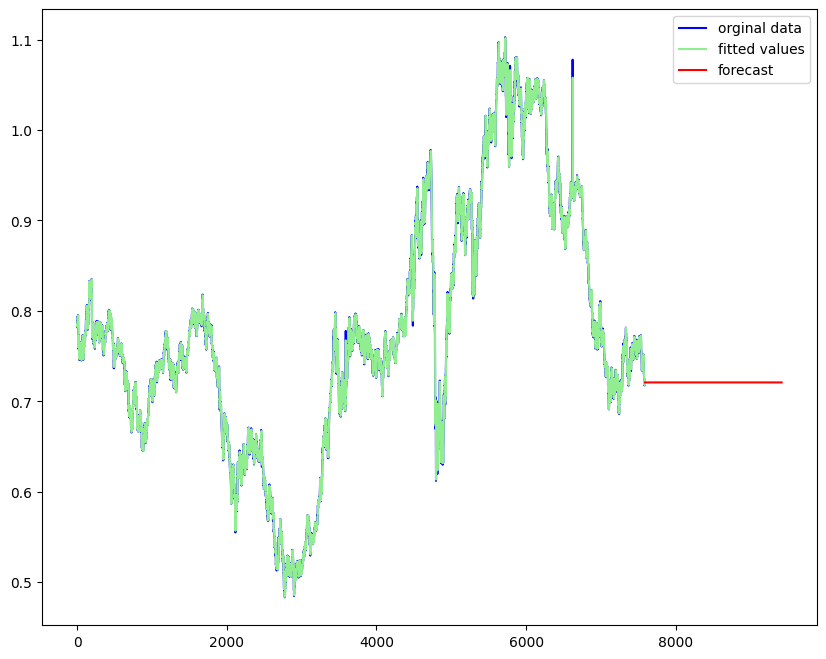

In [82]:
#plotting the orginal data and the fitted/forecasted values

plt.figure(figsize=(10,8))
plt.plot(df['Ex_rate'],label='orginal data',color='blue')
plt.plot(model_fitt.fittedvalues,label='fitted values',color='lightgreen')
plt.plot(range(len(df_new),len(df_new)+1825),forecast,label='forecast',color='red')
plt.legend()
plt.show()

In [84]:
#simple exponential smooting with fitting parameters

model=SimpleExpSmoothing(df['Ex_rate'])

model_fit=model.fit(smoothing_level=0.3,optimized=False)#optimized true will auto select the the smothvalue

#foresting for next five years

forecast=model_fit.forecast(steps=1825)

rmse=np.sqrt(np.mean(model_fit.resid**2))
print("root mean square error",rmse)

#print the results

print("Fitted values",model_fit.fittedvalues)
print("Forecasted values",forecast)

root mean square error 0.007687078585440962
Fitted values 0       0.785500
1       0.785500
2       0.784390
3       0.785083
4       0.785358
          ...   
7583    0.720235
7584    0.719713
7585    0.720350
7586    0.721204
7587    0.721091
Length: 7588, dtype: float64
Forecasted values 7588    0.721011
7589    0.721011
7590    0.721011
7591    0.721011
7592    0.721011
          ...   
9408    0.721011
9409    0.721011
9410    0.721011
9411    0.721011
9412    0.721011
Length: 1825, dtype: float64


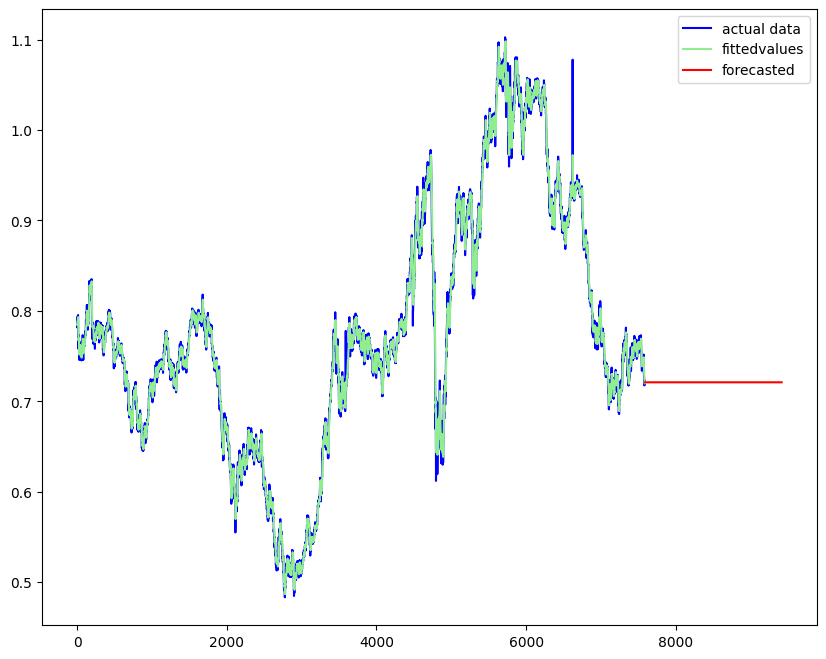

In [86]:
plt.figure(figsize=(10,8))
plt.plot(df_new["Ex_rate"],label="actual data",color='blue')
plt.plot(model_fit.fittedvalues,label="fittedvalues",color='lightgreen')
plt.plot(range(len(df_new),len(df_new)+1825),forecast,label='forecasted',color='red')

plt.legend()
plt.show()

In [88]:
#Holt's Linear Trend/Double exponential smooting

In [90]:
#calling the exponential library from statsmodels.tsa.holtwinters

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(df['Ex_rate'],trend='add',seasonal=None)#the trends='add' specifies the holts linera only using the "trend"

model_linear=model.fit(optimized=True)
print("The Best Smoothing level choosed by model=",model_linear.params['smoothing_level'])
print()

rmse=np.sqrt(np.mean(model_linear.resid**2))
print("Root Mean Square error=",rmse)
print()
#forecasting for next 5 yeras 
forecast=model_linear.forecast(steps=1825)

print("Fitted_values:",model_linear.fittedvalues)
print("forecasted values",forecast)

The Best Smoothing level choosed by model= 0.8700406123498317

Root Mean Square error= 0.005996578367543656

Fitted_values: 0       0.785086
1       0.785438
2       0.782264
3       0.786115
4       0.786006
          ...   
7583    0.718815
7584    0.718527
7585    0.721400
7586    0.722955
7587    0.721093
Length: 7588, dtype: float64
forecasted values 7588    0.720851
7589    0.720843
7590    0.720834
7591    0.720826
7592    0.720817
          ...   
9408    0.705314
9409    0.705306
9410    0.705297
9411    0.705289
9412    0.705280
Length: 1825, dtype: float64


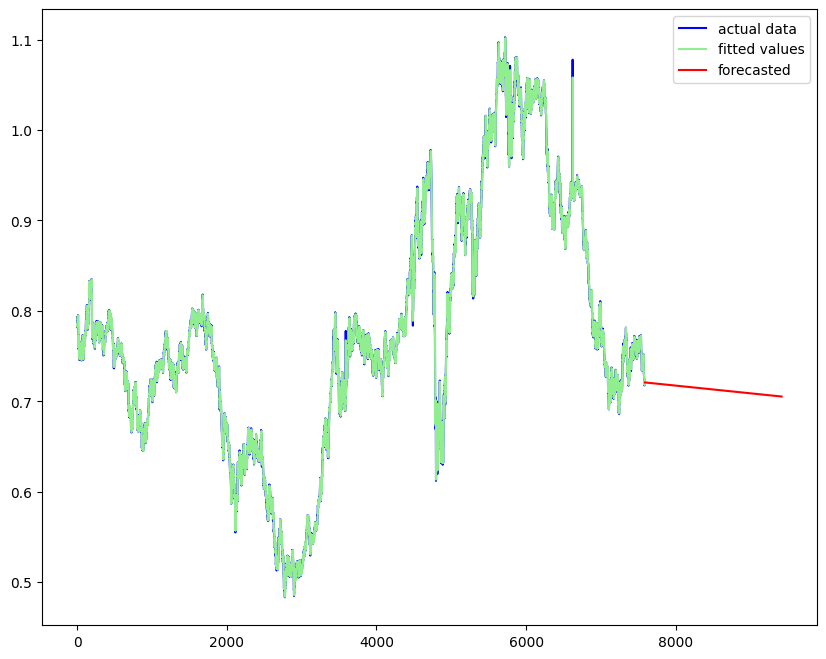

In [92]:
#plotting the line plot

plt.figure(figsize=(10,8))

plt.plot(df_new['Ex_rate'],label="actual data",color='blue')
plt.plot(model_linear.fittedvalues,label='fitted values',color='lightgreen')
plt.plot(range(len(df_new),len(df_new)+1825),forecast,label='forecasted',color='red')
plt.legend()
plt.show()

In [94]:
#holt winter seasonal model

In [96]:
#applying the holt winter exposmooting

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(df_new['Ex_rate'],trend='add',seasonal='add',seasonal_periods=6)

model_holt=model.fit(optimized=True)
print("the best Smoothing_level selected by model",model_holt.params)

the best Smoothing_level selected by model {'smoothing_level': 0.869615732399903, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 0.7869695344564177, 'initial_trend': -8.842085382416855e-06, 'initial_seasons': array([-0.00201344, -0.00184646, -0.00193281, -0.00173097, -0.0017136 ,
       -0.00195521]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [98]:
#calculating the metrics

rmse=np.sqrt(np.mean(model_holt.resid**2))
print("Root Mean Square error=",rmse)
print()

#forecasting for next 5 yeras 
forecast=model_holt.forecast(steps=1825)

print("Fitted_values:",model_holt.fittedvalues)
print("forecasted values",forecast)

Root Mean Square error= 0.005994756469086881

Fitted_values: 0       0.784947
1       0.785586
2       0.782198
3       0.786306
4       0.786048
          ...   
7583    0.718579
7584    0.718438
7585    0.721554
7586    0.722888
7587    0.721287
Length: 7588, dtype: float64
forecasted values 7588    0.720894
7589    0.720643
7590    0.720576
7591    0.720734
7592    0.720639
          ...   
9408    0.704501
9409    0.704659
9410    0.704564
9411    0.704757
9412    0.704766
Length: 1825, dtype: float64


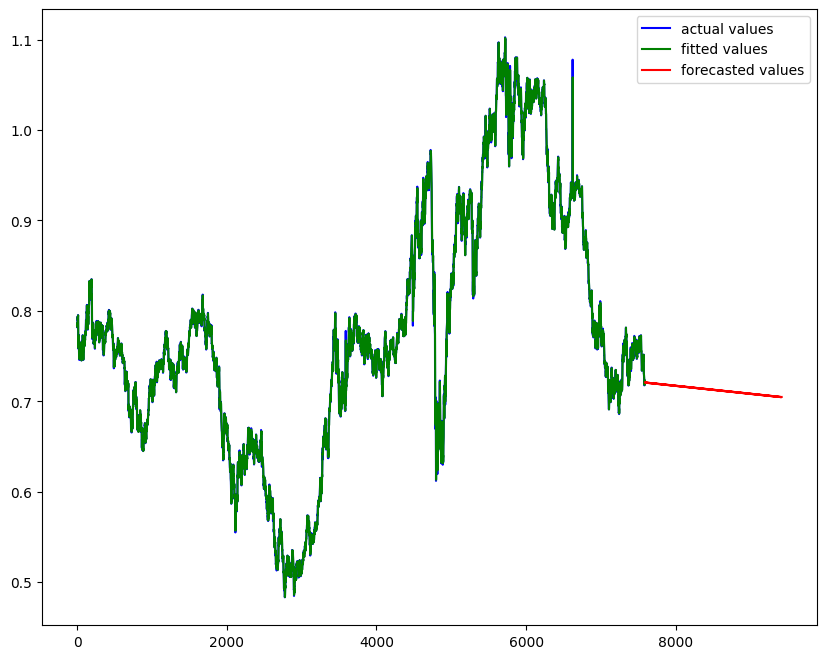

In [100]:
#plotting the figure

plt.figure(figsize=(10,8))
plt.plot(df_new['Ex_rate'],label="actual values",color='blue')
plt.plot(model_holt.fittedvalues,label='fitted values',color='green')
plt.plot(range(len(df_new),len(df_new)+1825),forecast,label='forecasted values',color='red')
plt.legend()
plt.show()

## Part 4: Evaluation and Comparison
Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

In [103]:
#spliting the dataset into train and test

train_size = int(len(df_new['Ex_rate']) * 0.8)
train, test = df_new['Ex_rate'][:train_size], df_new['Ex_rate'][train_size:]

# Display first few rows of the training data
print(train.head())

0    0.7855
1    0.7818
2    0.7867
3    0.7860
4    0.7849
Name: Ex_rate, dtype: float64


In [105]:
test

6070    1.025347
6071    1.026905
6072    1.037344
6073    1.038875
6074    1.032855
          ...   
7583    0.718494
7584    0.721839
7585    0.723197
7586    0.720825
7587    0.720825
Name: Ex_rate, Length: 1518, dtype: float64

In [107]:
#applying the simple exponential smoothing on train data and forecasting on test data

simple=SimpleExpSmoothing(train).fit(optimized=True)
simple_forecast=simple.forecast(len(test))

from sklearn.metrics import mean_squared_error,mean_absolute_error

mae = mean_absolute_error(test, simple_forecast)
rmse = np.sqrt(mean_squared_error(test, simple_forecast))
mape = np.mean(np.abs((test - simple_forecast) / test)) * 100

print("Model Evaluation:")
print(f"Simple Exponential Smoothing \n- MAE: {mae}\n -RMSE: {rmse}\n -MAPE: {mape}%")

Model Evaluation:
Simple Exponential Smoothing 
- MAE: 0.17763811683781777
 -RMSE: 0.20535637718497418
 -MAPE: 22.788856482440877%
